# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [88]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [5]:
Direct_Bilirubin=data['Direct_Bilirubin']
Total_Bilirubin=data['Total_Bilirubin']

In [29]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Direct_Bilirubin, Total_Bilirubin)
print('Коэффициент корреляции Пирсона: %.16f' % (corr))
print('p_value: %.16f' % (p_value))

Коэффициент корреляции Пирсона: 0.8746179301164134
p_value: 0.0000000000000000


In [30]:
pearsonr(Direct_Bilirubin, Total_Bilirubin)

(0.8746179301164134, 7.873553178023721e-185)

Высокая корреляционная связь наблюдается между прямым и общим билирубином,
согласно [таблицы Чеддака](https://medstatistic.ru/theory/pirson.html).

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

Построим модель для двух переменных Direct_Bilirubin и Total_Bilirubin. Библиотека sklearn в python - мощное средство для анализа данных. Позволяет строить различные модели. Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array.

In [51]:
Direct_Bilirubin = np.array(Direct_Bilirubin).reshape(-1,1)
Total_Bilirubin = np.array(Total_Bilirubin).reshape(-1,1)

Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Задача:** научиться предсказывать зависимость допустим **прямого билирубина (Direct_Bilirubin)** от **общего билирубина (Total_Bilirubin)** с помощью линейной регрессии!

Разделим данные на 80% тренировочных и на 20% тестовых

In [53]:
from sklearn.model_selection import train_test_split

# x = Direct_Bilirubin,
# y = Total_Bilirubin
X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,
    test_size = 0.2
)

Обучим модель с помощью fit() метода

In [54]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим предсказания модели на тестируемых данных

In [55]:
predicted_y = model.predict(X_test)

Посчитаем ошибку модели

In [56]:
model.score(X_test, y_test)

0.905012652243652

model.score - подсчет среднеквадратичной ошибки

90.5% точности на тестовых данных

Построим график линейной регресии

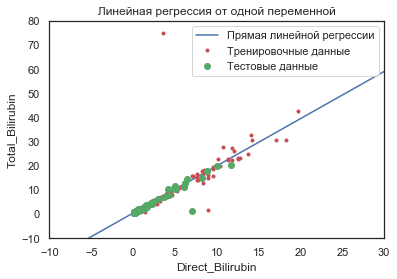

In [61]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-10, 30, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,30)
plt.ylim(-10,80)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Запускал моделирование два раза. Сначала точность была 37% поднялась до 90%. И видно,
что сейчас и удалённые красные и зелёные точки находятся рядом, ~(8,0) на графике.
Из минуса модели нет выше по прямой линейной регрессии перекрытия тренировочных и тестовых данных. Но в целом, удачное моделирование.

Сделаем моделирование линейной регрессии графически (дополнительно, без разделения данных)
с помощью *метода* **Jointplot** (c первоначальными значениями)

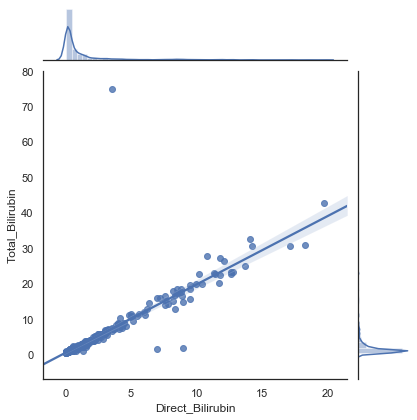

In [58]:
Direct_Bilirubin=data['Direct_Bilirubin']
Total_Bilirubin=data['Total_Bilirubin']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=Direct_Bilirubin, y=Total_Bilirubin, data=data, kind='reg')
plt.show()

In [64]:
age=data['Age'] 

Пример, как считать квантили:

In [65]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [66]:
data.quantile([.10, .25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [63]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех **колонок**. 

In [71]:
data.quantile([0.25,0.5,0.75])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


In [76]:
type(data.columns)

pandas.core.indexes.base.Index

In [79]:
list(data.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [8]:
Direct_Bilirubin=data['Direct_Bilirubin']

In [9]:
len(Direct_Bilirubin)

583

In [11]:
age=data['Age']

In [19]:
len(age)

583

In [20]:
Direct_Bilirubin_Age_up_to_50y=Direct_Bilirubin[age<50]

In [21]:
len(Direct_Bilirubin_Age_up_to_50y)

353

In [22]:
Direct_Bilirubin_Age_after_50y=Direct_Bilirubin[age>=50]

In [23]:
len(Direct_Bilirubin_Age_after_50y)

230

In [24]:
len(Direct_Bilirubin_Age_up_to_50y) + len(Direct_Bilirubin_Age_after_50y)

583

Предыдущая строка показывает, что мы всё правильно поделили по возрастам.

Перед тем, как продолжить, интересно посмотреть сколько составляет людей,
которым ровно 50 лет. Отнёс к группе, которым за 50. Всё правильно и они
хоть как-то это группу приближают по количеству к группе, которым меньше 50 лет.
Итак:

In [26]:
len(Direct_Bilirubin[age==50])

23

И, наконец, сами гистограммы:

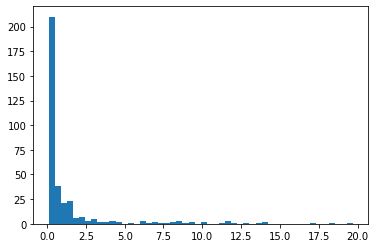

Среднее значение прямого билирубина для людей возраста до 50 лет: 1.4946175637393755
Квартили данного распределения:
 0.25    0.2
0.50    0.3
0.75    1.1
Name: Direct_Bilirubin, dtype: float64


In [45]:
DB_upto_50=Direct_Bilirubin_Age_up_to_50y
plt.hist(DB_upto_50, 50)
plt.show()
print('Среднее значение прямого билирубина для людей возраста до 50 лет:', DB_upto_50.mean())
print('Квартили данного распределения:\n', DB_upto_50.quantile([0.25,0.5,0.75]))

In [41]:
DB_upto_50.quantile([0.25,0.5,0.75])

0.25    0.2
0.50    0.3
0.75    1.1
Name: Direct_Bilirubin, dtype: float64

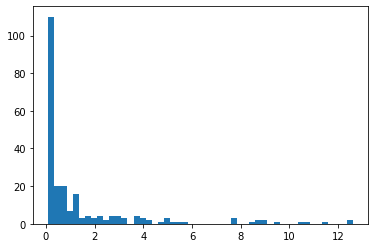

Среднее значение прямого билирубина для людей возраста после 50 лет: 1.4730434782608677
Квартили данного распределения:
 0.25    0.2
0.50    0.4
0.75    1.3
Name: Direct_Bilirubin, dtype: float64


In [47]:
DB_after_50=Direct_Bilirubin_Age_after_50y
plt.hist(DB_after_50, 50)
plt.show()
print('Среднее значение прямого билирубина для людей возраста после 50 лет:', DB_after_50.mean())
print('Квартили данного распределения:\n', DB_after_50.quantile([0.25,0.5,0.75]))

[Познакомился работая над домашней работой с cufflinks.](https://tproger.ru/translations/python-data-vizualization/)

In [60]:
pip install cufflinks plotly

  Created wheel for cufflinks: filename=cufflinks-0.17.0-cp37-none-any.whl size=68551 sha256=a08455f79705673f6322617dda81659ccf2f1d8f850af252ffbb520bc3637155
  Stored in directory: C:\Users\George\AppData\Local\pip\Cache\wheels\44\d7\dc\e830ab00bc2dd3b2731295103baa070f8cbdda8891f71a7a8d
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [65]:
import cufflinks
cufflinks.go_offline()

In [69]:
DB_upto_50.iplot(kind='box',
                yTitle='Прямой билирубин',
                title='Возраст меньше 50 лет')

In [70]:
DB_after_50.iplot(kind='box',
                yTitle='Прямой билирубин',
                title='Возраст 50 лет и старше')

Чем отличаются распределения?

Норма прямого билирубина от до 0 до 5,2.

Чем больше прямой билирубин, тем хуже здоровье.

Следовательно отрицательные моменты такие:

* Для людей старше 50 лет  медиана и третий квартиль имеет большее значение.
* Среднее значение для людей младше 50 лет больше.
* Максимальное значение для людей младше 50 лет больше.

Из положительных для обеих групп фактор, что межквартильный размах q3 - q1 находится в пределах нормы.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1)

Возьмем выборку пациент с болезнью печени (Dataset: 1) по параметру "Total_Bilirubin", то есть "Прямой Билирубин".

Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [72]:
patients_ill_tb = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(patients_ill_tb, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [75]:
print('Количество пациентов всего (генеральная совокупность): ', len(data['Total_Bilirubin']))

Количество пациентов всего (генеральная совокупность):  583


In [77]:
print('Количество пациентов с  болезнью печени среди них: ', len(patients_ill_tb))

Количество пациентов с  болезнью печени среди них:  416


*T*-значение 2.47, мы оцениваем p-value.
Количество пациентов в выборке = 416.

t-value = 2.471063305746647, n = 416, t = 415 (alpha = 0.05, N=95). Мы сравниваем t-value с табличным значением 1.95996635682 (или с  числом от 1.97993 до 1.95997, так как нет t = 415 в таблице) . Так как значение t-value превышает 1.96, то мы принимаем альтернативную гипотезу (о том, что средние значения выборок отличаются). 

Покажем это графически:

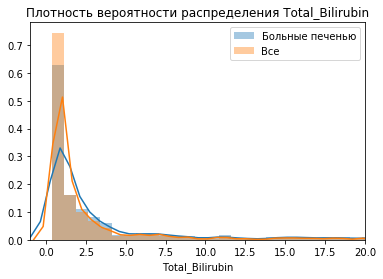

In [80]:
patients_ill_tb = data[data['Dataset']==1]['Total_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
sns.distplot(patients_ill_tb, 100)
sns.distplot(Total_Bilirubin, 100)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Больные печенью', 'Все'])
plt.xlim(-1, 20)
plt.show()

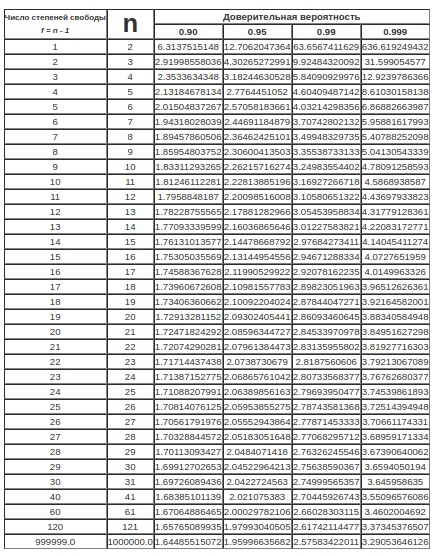

In [7]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [81]:
patients_ill_tb = data[data['Dataset']==1]['Total_Bilirubin']

patients_not_ill_tb = data[data['Dataset']==2]['Total_Bilirubin']

print(stats.ttest_ind(patients_ill_tb, patients_not_ill_tb))

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


p-value равно 7.8e-08 (фактически ноль), что намного меньше стандартной альфа ошибки 0.05 (и меньше 'медицинской альфы' в 0.01), поэтому мы принимаем альтернативную гипотезу и можем сказать, что имеется статистическое различие между больными и здоровыми людьми.

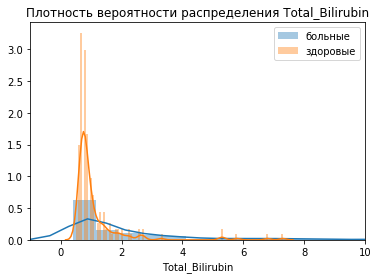

In [85]:
sns.distplot(patients_ill_tb, 100)
sns.distplot(patients_not_ill_tb, 100)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'здоровые'])
plt.xlim(-1, 10)
plt.show()

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [112]:
restecg_0 = data[(data['Age'] >=1) & (data['Age'] <30 )]['Dataset']

restecg_1 = data[(data['Age'] >=30) & (data['Age'] <55)]['Dataset']

restecg_2 = data[data['Age'] >= 55]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп по выборке 'Dataset'.

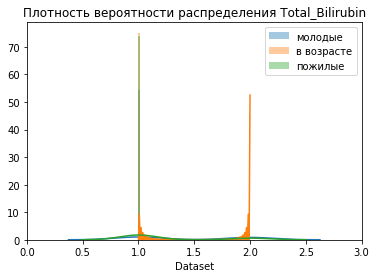

In [96]:
sns.distplot(restecg_0, 100)
sns.distplot(restecg_1, 100)
sns.distplot(restecg_2, 100)
plt.title('Плотность вероятности распределения по возрасту по выборке Dataset')
plt.legend(['молодые', 'в возрасте', 'пожилые'])
plt.xlim(0, 3)
plt.show()

Вопросы задавать на почту yustiks@gmail.com